In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
rm = pd.read_csv('rooms.csv')

In [3]:
rm.head()

,rooms,location,price
0,3,Ipaja,350000
1,3,Yaba,1200000
2,1,Surulere,600000
3,2,Ogba,700000
4,1,Mushin,400000


In [32]:
rm.dtypes

rooms        int64
location    object
price        int64
dtype: object

## Feature Engineering

In [4]:
# rm['location'],_ = pd.factorize(rm['location'])

In [5]:
# rm['location']

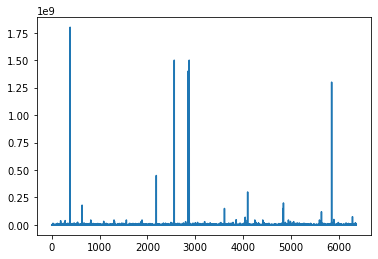

In [6]:
rm.price.plot()

In [49]:
# rm['price'] = np.log(rm['price'])

In [7]:
# rm.price

In [19]:
cat_feat = ['location']

In [10]:
X = rm.drop('price', axis = 1)
y = rm['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 47)

In [15]:
cbr = CatBoostRegressor()

In [16]:
parameters = {'depth'         : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
                 }

In [17]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
grid = GridSearchCV(estimator = cbr, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=cat_feat)

In [21]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.6995248941897076

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


In [39]:
model = CatBoostRegressor(iterations=91,
                          depth=6,
                          learning_rate=0.1,
                          loss_function='RMSE',
                          eval_metric= 'R2')

In [ ]:
model.fit(X_train, y_train, cat_features=cat_feat, eval_set=(X_test, y_test), plot=True)

In [41]:
model.feature_importances_

array([46.82397802, 53.17602198])

In [42]:
prediction = model.predict([[1, 'Ipaja']])

In [43]:
prediction

array([2.4928542])

In [44]:
prediction = np.exp(prediction)

In [45]:
np.exp(prediction)

array([179109.13178257])

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred = np.exp(y_pred)

In [49]:
y_pred = np.exp(y_pred)

In [50]:
y_pred

array([ 490332.57077797,  503805.30107469,  953697.8984381 , ...,
        947048.89740484, 1970184.95639806,  306656.69768106])

In [51]:
X_test

,rooms,location
72,1,Yaba
2529,1,Ajah
1375,1,Lekki
708,3,Ikeja
5952,3,Ikoyi
...,...,...
4960,3,Ajah
975,3,Lekki
5903,3,Ikosi
5198,3,Maryland


In [65]:
# result = (model.evals_result_)

### How do I print the mean of R2, RMSE in learn and validation sets ?

Simple. Don't use result = (model.evals_result_).

Instead, run model.score then model.best_score_

In [63]:
model.score

<bound method CatBoostRegressor.score of <catboost.core.CatBoostRegressor object at 0x0000000971CDD308>>

In [64]:
model.best_score_

{'learn': {'R2': 0.7067571870793019, 'RMSE': 0.0407914076779136},
 'validation': {'R2': 0.7646917097531173, 'RMSE': 0.034539499182530756}}

In [66]:
model.get_params()

{'iterations': 91,
 'learning_rate': 0.1,
 'depth': 6,
 'loss_function': 'RMSE',
 'eval_metric': 'R2'}

In [1]:
pip install fastapi uvicorn

  Using cached fastapi-0.63.0-py3-none-any.whl (50 kB)
  Using cached uvicorn-0.13.3-py3-none-any.whl (45 kB)
  Using cached starlette-0.13.6-py3-none-any.whl (59 kB)
  Using cached h11-0.12.0-py3-none-any.whl (54 kB)
Note: you may need to restart the kernel to use updated packages.
